In [ ]:
!pip install sklearn

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


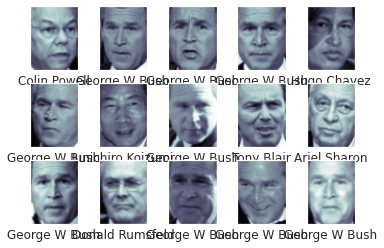

In [ ]:
fig,ax = plt.subplots(3,5)
for i ,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap='bone')
  axi.set(xticks=[],yticks=[],
      xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(faces.data,faces.target,random_state=40)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"svc__C":[1,5,10],
        "svc__gamma":[0.0001,0.0005,0.001]}
grid = GridSearchCV(model,param_grid)

%time grid.fit(xtrain,ytrain)
print(grid.best_params_)

CPU times: user 38.9 s, sys: 10.2 s, total: 49.1 s
Wall time: 30.4 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(xtest)
yfit.shape

(337,)

Text(0.5, 0.98, 'Predicted Names: Incorrect Labels in Red')

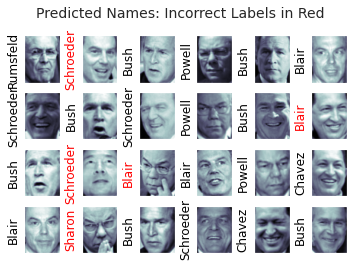

In [ ]:
fig,ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
  axi.imshow(xtest[i].reshape(62,47),cmap='bone')
  axi.set(xticks=[],yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                 color="black" if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names: Incorrect Labels in Red',size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,
              target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.50      0.50        16
     Colin Powell       0.69      0.81      0.75        54
  Donald Rumsfeld       0.83      0.85      0.84        34
    George W Bush       0.94      0.88      0.91       136
Gerhard Schroeder       0.72      0.85      0.78        27
      Hugo Chavez       0.81      0.72      0.76        18
Junichiro Koizumi       0.87      0.87      0.87        15
       Tony Blair       0.85      0.76      0.80        37

         accuracy                           0.82       337
        macro avg       0.78      0.78      0.78       337
     weighted avg       0.83      0.82      0.82       337



Text(89.18, 0.5, 'predicted label')

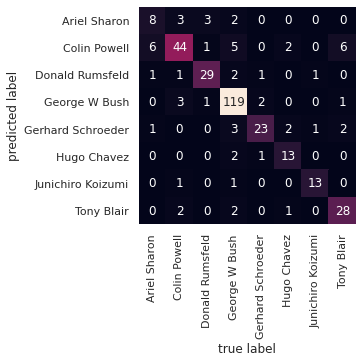

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")